In [29]:
import torch
import matplotlib.pyplot as plt
from PIL import Image
import imageio.v2

In [30]:
def f(x):
  return 10*x[0]**2 + x[1]**2

In [31]:
def f1(x):
  return torch.tensor([20*x[0],2*x[1]])

In [32]:
x = torch.tensor([[2,2]])
y = torch.tensor(2)
print(f1(x[0]))
print(x[0])

tensor([40,  4])
tensor([2, 2])


In [33]:
def vanilla_SGD(input_value,k,lr):
  weights = input_value
  # print(weights[0])
  dummy = input_value[0]
  # print(dummy)
  for i in range(k):
    dummy = dummy - lr*f1(weights[i])
    # print(dummy)
    weights = torch.cat((weights,torch.unsqueeze(dummy,0)),0)
  return weights

In [34]:
input= torch.tensor([[2,2]])
outputv_sgd = vanilla_SGD(input,60,0.04)
print(outputv_sgd)

tensor([[2.0000e+00, 2.0000e+00],
        [4.0000e-01, 1.8400e+00],
        [8.0000e-02, 1.6928e+00],
        [1.6000e-02, 1.5574e+00],
        [3.2000e-03, 1.4328e+00],
        [6.4000e-04, 1.3182e+00],
        [1.2800e-04, 1.2127e+00],
        [2.5600e-05, 1.1157e+00],
        [5.1200e-06, 1.0264e+00],
        [1.0240e-06, 9.4432e-01],
        [2.0480e-07, 8.6878e-01],
        [4.0960e-08, 7.9927e-01],
        [8.1920e-09, 7.3533e-01],
        [1.6384e-09, 6.7651e-01],
        [3.2768e-10, 6.2239e-01],
        [6.5536e-11, 5.7259e-01],
        [1.3107e-11, 5.2679e-01],
        [2.6214e-12, 4.8464e-01],
        [5.2429e-13, 4.4587e-01],
        [1.0486e-13, 4.1020e-01],
        [2.0972e-14, 3.7739e-01],
        [4.1943e-15, 3.4720e-01],
        [8.3886e-16, 3.1942e-01],
        [1.6777e-16, 2.9387e-01],
        [3.3554e-17, 2.7036e-01],
        [6.7109e-18, 2.4873e-01],
        [1.3422e-18, 2.2883e-01],
        [2.6844e-19, 2.1052e-01],
        [5.3687e-20, 1.9368e-01],
        [1.073

In [35]:
def SGD_momentum(input_value,k,lr,sigma):
  weights = input_value
  dummyw = input_value[0]
  v = torch.tensor([[0,0]])
  dummyv = torch.tensor([0,0])
  for i in range(k):
    dummyv = sigma*dummyv + f1(weights[i])
    v = torch.cat((v,torch.unsqueeze(dummyv,0)),0)
    dummyw = dummyw - lr*v[i+1]
    weights = torch.cat((weights,torch.unsqueeze(dummyw,0)),0)
  return weights,v

In [36]:
outputsgd_m,v = SGD_momentum(input,60,0.005,0.8)
print(outputsgd_m)
print(v)

tensor([[ 2.0000e+00,  2.0000e+00],
        [ 1.8000e+00,  1.9800e+00],
        [ 1.4600e+00,  1.9442e+00],
        [ 1.0420e+00,  1.8961e+00],
        [ 6.0340e-01,  1.8387e+00],
        [ 1.9218e-01,  1.7744e+00],
        [-1.5601e-01,  1.7052e+00],
        [-4.1897e-01,  1.6327e+00],
        [-5.8743e-01,  1.5585e+00],
        [-6.6346e-01,  1.4835e+00],
        [-6.5794e-01,  1.4087e+00],
        [-5.8773e-01,  1.3347e+00],
        [-4.7279e-01,  1.2622e+00],
        [-3.3355e-01,  1.1916e+00],
        [-1.8881e-01,  1.1232e+00],
        [-5.4137e-02,  1.0572e+00],
        [ 5.9016e-02,  9.9384e-01],
        [ 1.4364e-01,  9.3323e-01],
        [ 1.9697e-01,  8.7541e-01],
        [ 2.1994e-01,  8.2039e-01],
        [ 2.1632e-01,  7.6818e-01],
        [ 1.9179e-01,  7.1872e-01],
        [ 1.5299e-01,  6.7198e-01],
        [ 1.0665e-01,  6.2786e-01],
        [ 5.8916e-02,  5.8628e-01],
        [ 1.4835e-02,  5.4716e-01],
        [-2.1914e-02,  5.1039e-01],
        [-4.9122e-02,  4.758

In [37]:
def Nesterov_Momentum(input_value,k,lr,sigma):
  weights = input_value
  dummyw = input_value[0]
  v = torch.tensor([[0,0]])
  dummyv = torch.tensor([0,0])
  for i in range(k):
    dummyv = sigma*dummyv + f1(weights[i]+sigma*v[i])
    v = torch.cat((v,torch.unsqueeze(dummyv,0)),0)
   
    dummyw = dummyw - lr*v[i+1]
    weights = torch.cat((weights,torch.unsqueeze(dummyw,0)),0)
  return weights,v

In [38]:
outputn_m,v = Nesterov_Momentum(input,60,0.04,0.028)
# print(v)
print(outputn_m)

tensor([[ 2.0000e+00,  2.0000e+00],
        [ 4.0000e-01,  1.8400e+00],
        [-8.6080e-01,  1.6794e+00],
        [-9.1351e-01,  1.5315e+00],
        [-2.1370e-01,  1.3966e+00],
        [ 3.6875e-01,  1.2735e+00],
        [ 4.1623e-01,  1.1613e+00],
        [ 1.1116e-01,  1.0590e+00],
        [-1.5715e-01,  9.6565e-01],
        [-1.8920e-01,  8.8056e-01],
        [-5.6684e-02,  8.0297e-01],
        [ 6.6580e-02,  7.3222e-01],
        [ 8.5795e-02,  6.6769e-01],
        [ 2.8457e-02,  6.0886e-01],
        [-2.8023e-02,  5.5521e-01],
        [-3.8815e-02,  5.0629e-01],
        [-1.4109e-02,  4.6167e-01],
        [ 1.1706e-02,  4.2099e-01],
        [ 1.7520e-02,  3.8389e-01],
        [ 6.9229e-03,  3.5007e-01],
        [-4.8465e-03,  3.1922e-01],
        [-7.8897e-03,  2.9109e-01],
        [-3.3673e-03,  2.6544e-01],
        [ 1.9857e-03,  2.4205e-01],
        [ 3.5447e-03,  2.2072e-01],
        [ 1.6256e-03,  2.0127e-01],
        [-8.0328e-04,  1.8354e-01],
        [-1.5889e-03,  1.673

In [39]:
x = torch.tensor([2,2])
y = torch.tensor([1,1])
y = torch.sqrt(x)
y


tensor([1.4142, 1.4142])

In [40]:
def AdaGrad(input_value,k,lr):
  weights = input_value
  dummyw = input_value[0]
  grad_sq = torch.tensor([[0,0]])
  dummyg_sq = torch.tensor([0,0])
  for i in range(k):
    dummyg_sq = f1(weights[i])
    grad_sq = torch.cat((grad_sq,torch.unsqueeze((grad_sq[i] + dummyg_sq**2),0)),0)
    dummyw = dummyw - lr*dummyg_sq/(torch.sqrt(grad_sq[i+1]) + 0.01)
    weights = torch.cat((weights,torch.unsqueeze(dummyw,0)),0)
  print(weights)
  return weights

In [41]:
output_ag = AdaGrad(input,60,0.5)

tensor([[2.0000e+00, 2.0000e+00],
        [1.5001e+00, 1.5012e+00],
        [1.2002e+00, 1.2017e+00],
        [9.8382e-01, 9.8552e-01],
        [8.1668e-01, 8.1844e-01],
        [6.8299e-01, 6.8475e-01],
        [5.7387e-01, 5.7560e-01],
        [4.8370e-01, 4.8536e-01],
        [4.0855e-01, 4.1013e-01],
        [3.4559e-01, 3.4707e-01],
        [2.9263e-01, 2.9401e-01],
        [2.4796e-01, 2.4924e-01],
        [2.1022e-01, 2.1140e-01],
        [1.7829e-01, 1.7937e-01],
        [1.5125e-01, 1.5223e-01],
        [1.2833e-01, 1.2922e-01],
        [1.0891e-01, 1.0971e-01],
        [9.2427e-02, 9.3150e-02],
        [7.8447e-02, 7.9096e-02],
        [6.6585e-02, 6.7166e-02],
        [5.6519e-02, 5.7037e-02],
        [4.7976e-02, 4.8437e-02],
        [4.0725e-02, 4.1134e-02],
        [3.4570e-02, 3.4933e-02],
        [2.9346e-02, 2.9667e-02],
        [2.4911e-02, 2.5195e-02],
        [2.1147e-02, 2.1398e-02],
        [1.7951e-02, 1.8172e-02],
        [1.5239e-02, 1.5433e-02],
        [1.293

In [42]:
def RMS_prop(input_value,k,lr,sigma):
  weights = input_value
  dummyw = input_value[0]
  grad_sq = torch.tensor([[0,0]])
  dummyg_sq = torch.tensor([0,0])
  for i in range(k):
    dummyg_sq = f1(weights[i])
    grad_sq = torch.cat((grad_sq,torch.unsqueeze((sigma*grad_sq[i] + (1-sigma)*dummyg_sq**2),0)),0)
    dummyw = dummyw - lr*dummyg_sq/(torch.sqrt(grad_sq[i+1]) + 0.01)
    weights = torch.cat((weights,torch.unsqueeze(dummyw,0)),0)
  print(weights)
  return weights 

In [43]:
output_rp = RMS_prop(input,60,0.09,0.5)

tensor([[ 2.0000e+00,  2.0000e+00],
        [ 1.8728e+00,  1.8732e+00],
        [ 1.7712e+00,  1.7719e+00],
        [ 1.6784e+00,  1.6793e+00],
        [ 1.5894e+00,  1.5905e+00],
        [ 1.5024e+00,  1.5038e+00],
        [ 1.4166e+00,  1.4182e+00],
        [ 1.3315e+00,  1.3333e+00],
        [ 1.2470e+00,  1.2490e+00],
        [ 1.1629e+00,  1.1652e+00],
        [ 1.0794e+00,  1.0819e+00],
        [ 9.9628e-01,  9.9914e-01],
        [ 9.1375e-01,  9.1691e-01],
        [ 8.3184e-01,  8.3531e-01],
        [ 7.5066e-01,  7.5446e-01],
        [ 6.7033e-01,  6.7447e-01],
        [ 5.9103e-01,  5.9553e-01],
        [ 5.1296e-01,  5.1784e-01],
        [ 4.3644e-01,  4.4171e-01],
        [ 3.6187e-01,  3.6753e-01],
        [ 2.8983e-01,  2.9587e-01],
        [ 2.2118e-01,  2.2754e-01],
        [ 1.5718e-01,  1.6376e-01],
        [ 9.9820e-02,  1.0634e-01],
        [ 5.2111e-02,  5.8056e-02],
        [ 1.8202e-02,  2.2670e-02],
        [ 1.6205e-03,  3.6264e-03],
        [-4.6255e-04, -5.975

In [44]:
# for i in range(61):
#   plt.scatter(outputv_sgd[:i,0],outputv_sgd[:i,1],s=2,label = 'sgd')
#   plt.scatter(outputsgd_m[:i,0],outputsgd_m[:i,1],s=2,label = 'sgd+m')
#   plt.scatter(outputn_m[:i,0],outputn_m[:i,1],s=2,label = 'nesterov')
#   plt.scatter(output_ag [:i,0],output_ag[:i,1],s=2,label = 'adaGrad')
#   plt.scatter(output_rp[:i,0],output_rp[:i,1],s=2,label = 'RMSProp')
#   plt.xlim((-2.5,2.5))
#   plt.ylim(-0.5,2.5)
#   plt.legend()

#   plt.savefig("plot{}".format(i))
#   plt.show()


In [45]:
!pip install imageio

Defaulting to user installation because normal site-packages is not writeable


In [46]:
# all_images = []

# for i in range(1,61):
#   all_images.append(imageio.v2.imread("/content/plot" + str(i) + ".png"))

# imageio.mimsave("optimizers.gif",all_images)

1st Question

In [50]:
from torchvision.io import read_image
from torchvision.models import resnet50, ResNet50_Weights
img1 = read_image("D:\STUDIES\semester 4\Deep Learning\Assignments\AI2100_Assignment3\i1.jpg")
img2 = read_image("D:\STUDIES\semester 4\Deep Learning\Assignments\AI2100_Assignment3\i2.jpg")
img3 = read_image("D:\STUDIES\semester 4\Deep Learning\Assignments\AI2100_Assignment3\i3.jpg")
img4 = read_image("D:\STUDIES\semester 4\Deep Learning\Assignments\AI2100_Assignment3\i4.jpg")
img5 = read_image("D:\STUDIES\semester 4\Deep Learning\Assignments\AI2100_Assignment3\i5.jpg")

# Step 1: Initialize model with the best available weights
weights = ResNet50_Weights.DEFAULT
model = resnet50(weights=weights)
model.eval()


for param in model.parameters():
    param.requires_grad = False
    
# Step 2: Initialize the inference transforms
preprocess = weights.transforms()

# Step 3: Apply inference preprocessing transforms
batch1 = preprocess(img1).unsqueeze(0)
batch2 = preprocess(img2).unsqueeze(0)
batch3 = preprocess(img3).unsqueeze(0)
batch4 = preprocess(img4).unsqueeze(0)
batch5 = preprocess(img5).unsqueeze(0)

# Step 4: Use the model and print the predicted category
prediction1 = model(batch1).squeeze(0).softmax(0)
class_id1 = prediction1.argmax().item()
score1 = prediction1[class_id1].item()
category_name1 = weights.meta["categories"][class_id1]
print(f"{category_name1}: {100 * score1:.1f}%")

prediction2 = model(batch2).squeeze(0).softmax(0)
class_id2 = prediction2.argmax().item()
score2 = prediction2[class_id2].item()
category_name2 = weights.meta["categories"][class_id2]
print(f"{category_name2}: {100 * score2:.1f}%")

prediction3 = model(batch3).squeeze(0).softmax(0)
class_id3 = prediction3.argmax().item()
score3 = prediction3[class_id3].item()
category_name3 = weights.meta["categories"][class_id3]
print(f"{category_name3}: {100 * score3:.1f}%")

prediction4 = model(batch4).squeeze(0).softmax(0)
class_id4 = prediction4.argmax().item()
score4 = prediction4[class_id4].item()
category_name4 = weights.meta["categories"][class_id4]
print(f"{category_name4}: {100 * score4:.1f}%")

prediction5 = model(batch5).squeeze(0).softmax(0)
class_id5 = prediction5.argmax().item()
score5 = prediction5[class_id5].item()
category_name5 = weights.meta["categories"][class_id5]
print(f"{category_name5}: {100 * score5:.1f}%")

C:\Users\kamuj\AppData\Roaming\Python\Python310\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


German shepherd: 30.8%
rock python: 26.0%
steel drum: 63.0%
desk: 13.3%
tiger cat: 10.4%


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


torch.Size([224, 224, 3])


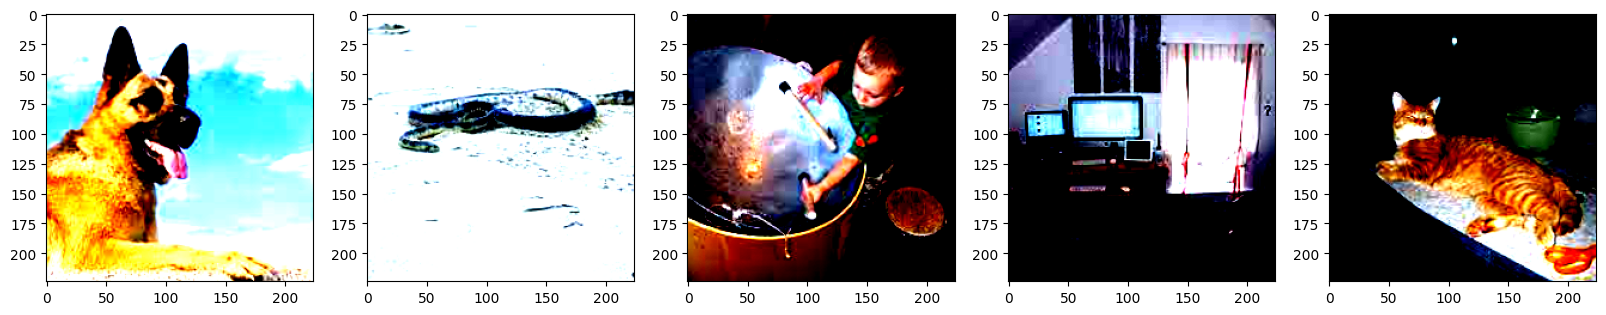

In [51]:
index1 = prediction1.argmax()
index2 = prediction2.argmax()
index3 = prediction3.argmax()
index4 = prediction4.argmax()
index5 = prediction5.argmax()

img1 = read_image("D:\STUDIES\semester 4\Deep Learning\Assignments\AI2100_Assignment3\i1.jpg")
img2 = read_image("D:\STUDIES\semester 4\Deep Learning\Assignments\AI2100_Assignment3\i2.jpg")
img3 = read_image("D:\STUDIES\semester 4\Deep Learning\Assignments\AI2100_Assignment3\i3.jpg")
img4 = read_image("D:\STUDIES\semester 4\Deep Learning\Assignments\AI2100_Assignment3\i4.jpg")
img5 = read_image("D:\STUDIES\semester 4\Deep Learning\Assignments\AI2100_Assignment3\i5.jpg")

# nimg = preprocess(img)
img_show1 = torch.einsum("chw->hwc",preprocess(img1))
img_show2 = torch.einsum("chw->hwc",preprocess(img2))
img_show3 = torch.einsum("chw->hwc",preprocess(img3))
img_show4 = torch.einsum("chw->hwc",preprocess(img4))
img_show5 = torch.einsum("chw->hwc",preprocess(img5))

print(img_show1.shape)
plt.figure(figsize = (20,10))
plt.subplot(1,5,1)
plt.imshow(img_show1)
plt.subplot(1,5,2)
plt.imshow(img_show2)
plt.subplot(1,5,3)
plt.imshow(img_show3)
plt.subplot(1,5,4)
plt.imshow(img_show4)
plt.subplot(1,5,5)
plt.imshow(img_show5)
plt.show()

In [52]:
def vanilla_backpropagation(img_show,index,batch):
  # here in image argmax there is a value 1 at the argmax of index of the given image
  img_argmax = torch.zeros(1000)
  img_argmax[index] = 1
  # vanilla backpropagation
  batch.requires_grad = True
  my_output1 = model(batch)
  v = torch.dot(img_argmax,my_output1.squeeze())
  v.backward()
  ans_grad = torch.einsum("chw->hwc",batch.grad.squeeze())
  ans_grad = (ans_grad - torch.min(ans_grad))/(torch.max(ans_grad) - torch.min(ans_grad))
  batch.grad.zero_()
  # plotting the image
  plt.figure(figsize = (10,10))
  plt.subplot(1,2,1)
  plt.imshow(img_show)
  plt.subplot(1,2,2)
  plt.imshow(ans_grad)
  return

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


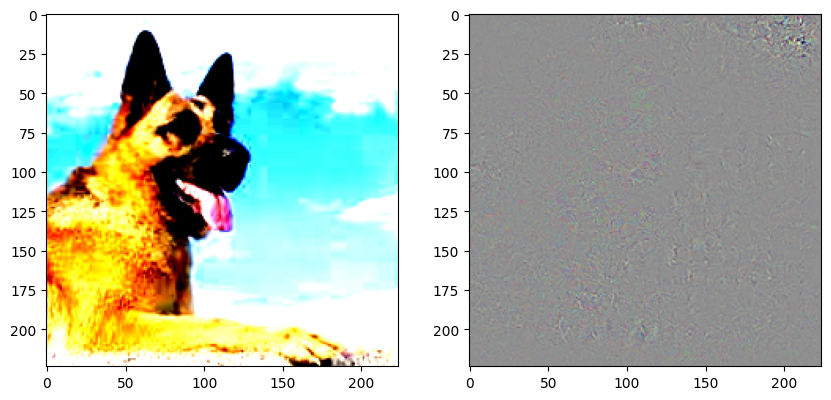

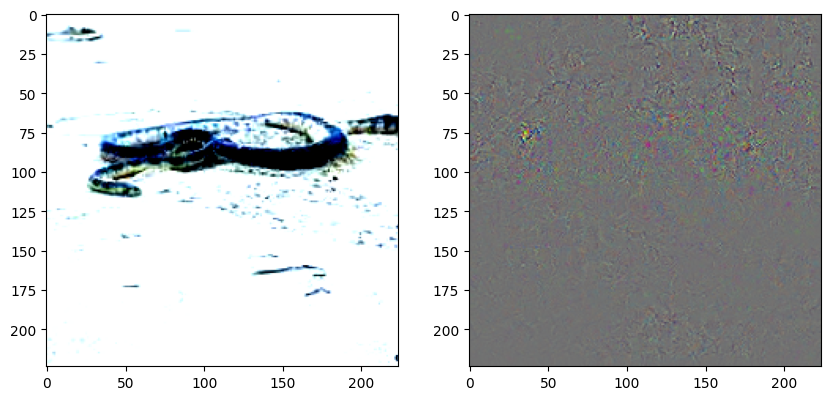

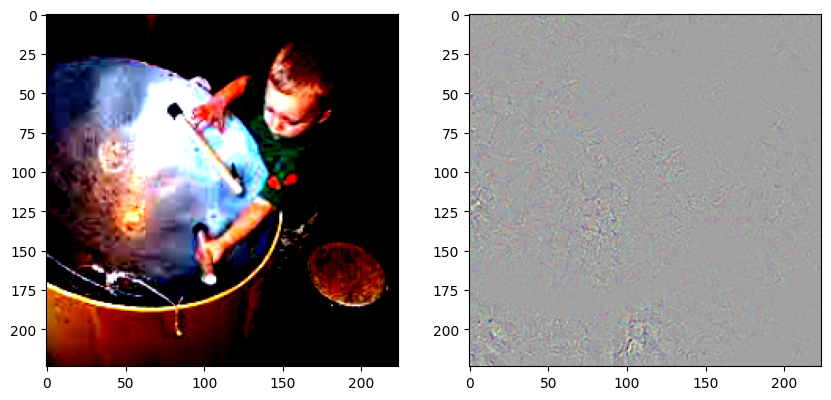

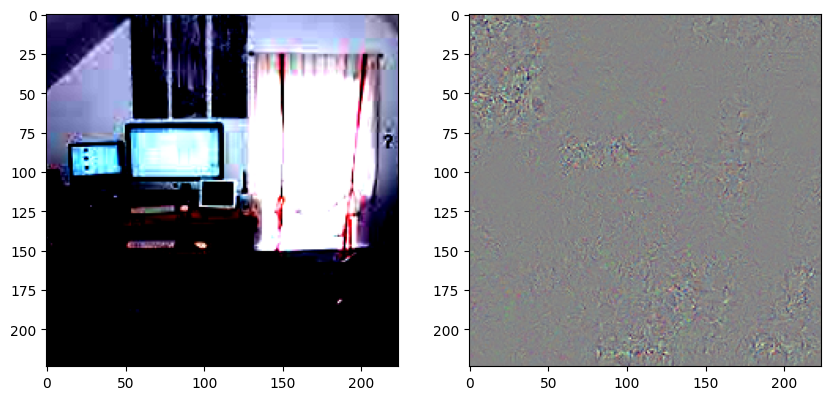

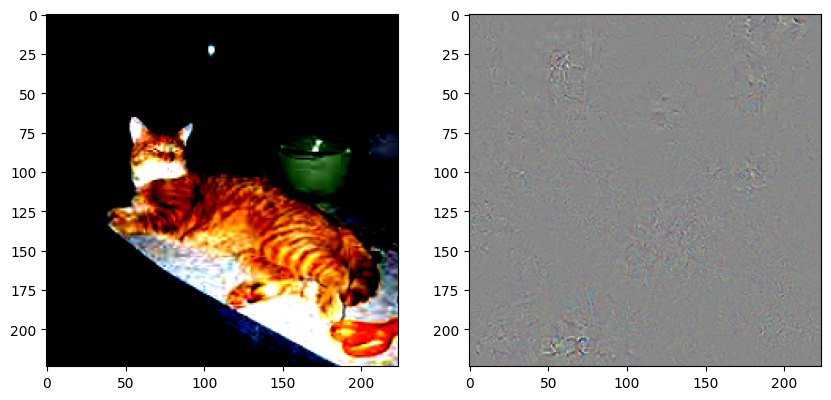

In [53]:
vanilla_backpropagation(img_show1,index1,batch1)
vanilla_backpropagation(img_show2,index2,batch2)
vanilla_backpropagation(img_show3,index3,batch3)
vanilla_backpropagation(img_show4,index4,batch4)
vanilla_backpropagation(img_show5,index5,batch5)

1)**b**

In [54]:
def RELU(x):
  zeros = torch.zeros_like(x)
  return torch.maximum(zeros,x)

In [55]:
def relu_backward_hook(module,grad_input,grad_output):
    new_grad_input = RELU(grad_input[0].clone())
    return (new_grad_input,)

In [56]:
import torch.nn as nn
for name, module in model.named_modules():
    if isinstance(module, nn.ReLU):
        module.register_backward_hook(relu_backward_hook)

In [57]:
def guided_backpropagation(img_show,index,batch):
  # here in image argmax there is a value 1 at the argmax of index of the given image
  img_argmax = torch.zeros(1000)
  img_argmax[index] = 1
  # guided backpropagation
  batch.requires_grad = True
  my_output1 = model(batch)
  v = torch.dot(img_argmax,my_output1.squeeze())
  v.backward()
  ans_grad = torch.einsum("chw->hwc",batch.grad.squeeze())
  ans_grads = (ans_grad - torch.min(ans_grad))/(torch.max(ans_grad) - torch.min(ans_grad))
  batch.grad.zero_()
  # plotting the image
  plt.figure(figsize = (10,10))
  plt.subplot(1,2,1)
  plt.imshow(img_show)
  plt.subplot(1,2,2)
  plt.imshow(ans_grads)
  return ans_grad

C:\Users\kamuj\AppData\Roaming\Python\Python310\site-packages\torch\nn\modules\module.py:1344: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for inte

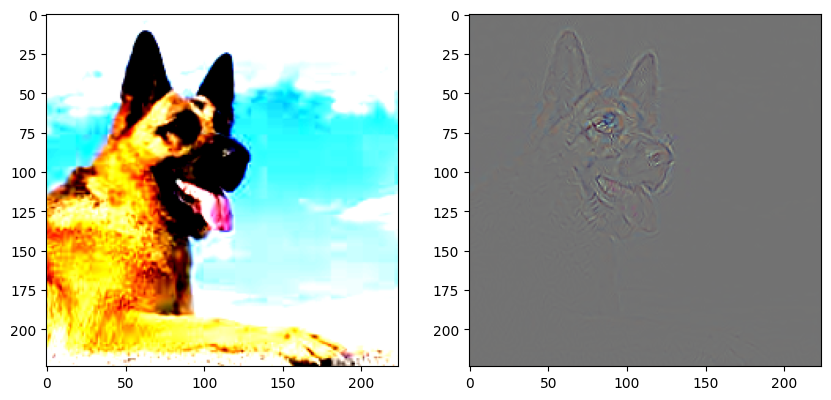

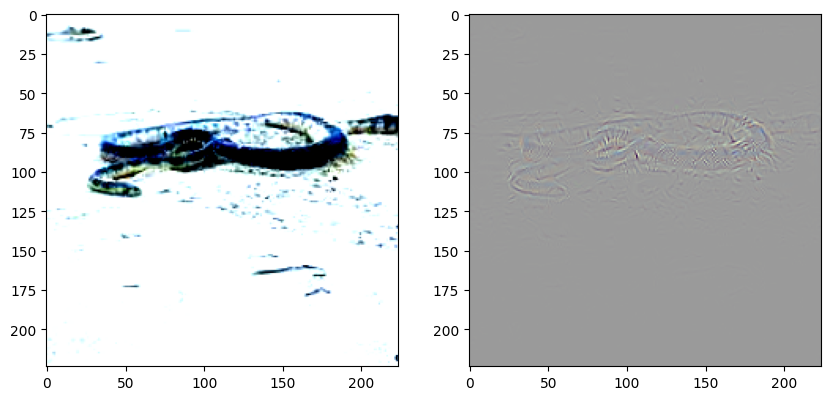

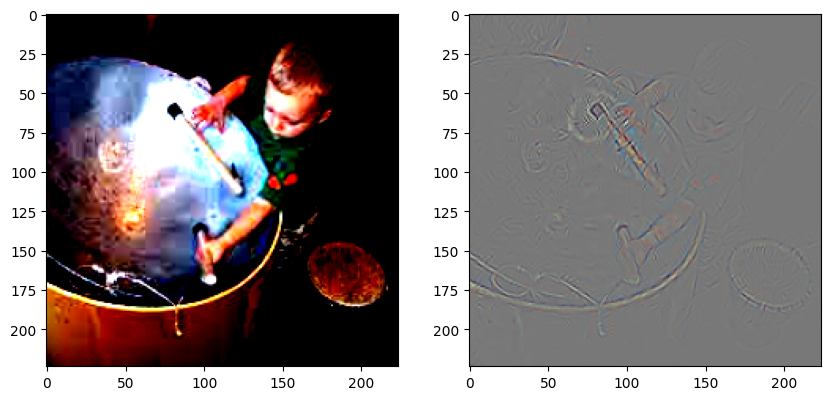

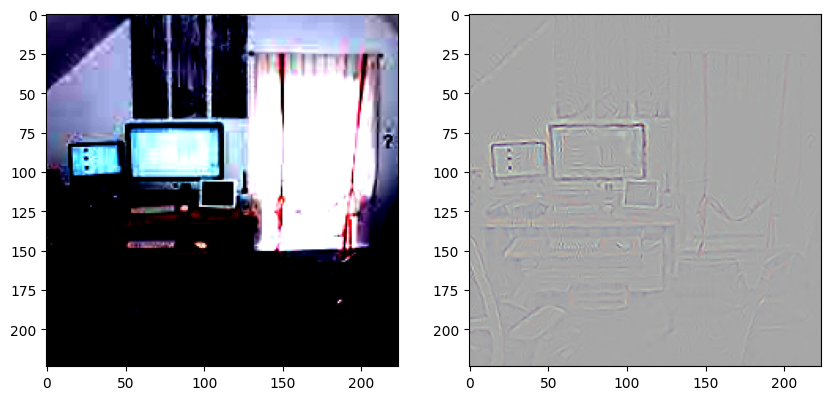

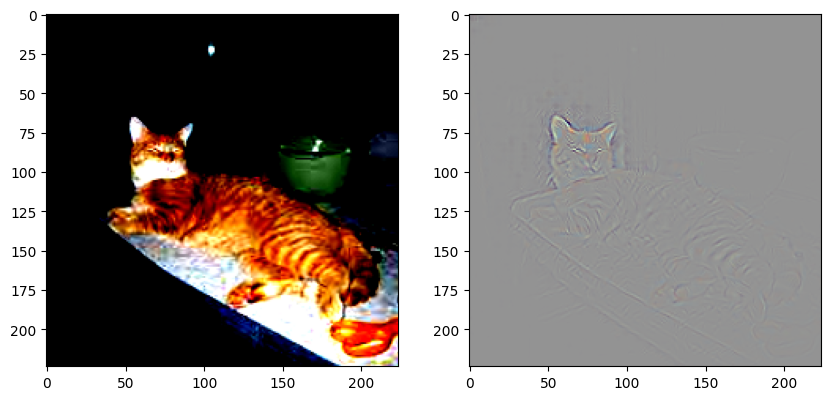

In [58]:
guided_gradients_1 =guided_backpropagation(img_show1,index1,batch1)
guided_gradients_2 =guided_backpropagation(img_show2,index2,batch2)
guided_gradients_3 =guided_backpropagation(img_show3,index3,batch3)
guided_gradients_4 =guided_backpropagation(img_show4,index4,batch4)
guided_gradients_5 =guided_backpropagation(img_show5,index5,batch5)

1)c

Defaulting to user installation because normal site-packages is not writeable
     ---------------------------------------- 0.0/38.1 MB ? eta -:--:--
     ---------------------------------------- 0.0/38.1 MB 1.3 MB/s eta 0:00:30
     ---------------------------------------- 0.2/38.1 MB 2.0 MB/s eta 0:00:20
     ---------------------------------------- 0.3/38.1 MB 2.5 MB/s eta 0:00:16
      --------------------------------------- 0.5/38.1 MB 2.8 MB/s eta 0:00:14
      --------------------------------------- 0.7/38.1 MB 3.3 MB/s eta 0:00:12
      --------------------------------------- 0.9/38.1 MB 3.2 MB/s eta 0:00:12
     - -------------------------------------- 1.0/38.1 MB 3.5 MB/s eta 0:00:11
     - -------------------------------------- 1.2/38.1 MB 3.5 MB/s eta 0:00:11
     - -------------------------------------- 1.4/38.1 MB 3.6 MB/s eta 0:00:11
     - -------------------------------------- 1.6/38.1 MB 3.5 MB/s eta 0:00:11
     - -------------------------------------- 1.8/38.1 MB 3.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


(224, 224, 3)


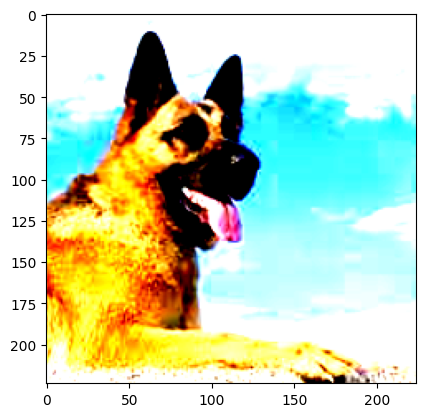

<Figure size 640x480 with 0 Axes>

In [59]:
!pip install opencv-python-headless
import cv2
img_show1 = img_show1.numpy()
img_show2 = img_show2.numpy()
img_show3 = img_show3.numpy()
img_show4 = img_show4.numpy()
img_show5 = img_show5.numpy()

print(img_show1.shape)
plt.imshow(img_show1)
plt.figure()

cv_img1 = cv2.resize(img_show1,(224,224))
cv_img2 = cv2.resize(img_show2,(224,224))
cv_img3 = cv2.resize(img_show3,(224,224))
cv_img4 = cv2.resize(img_show4,(224,224))
cv_img5 = cv2.resize(img_show5,(224,224))

In [62]:
modellist = list(model.children())
print(modellist[9])
print(modellist[9].weight[class_id1].shape)

Linear(in_features=2048, out_features=1000, bias=True)
torch.Size([2048])


In [63]:
from torchvision import transforms
import torch.nn as nn
import cv2
import numpy as np
def CAM(image,cv_img,index):

  res50_conv = nn.Sequential(*list(model.children())[:-2])

  for param in res50_conv.parameters():
      param.requires_grad = False

  # Load the image and preprocess it
  # image = Image.open("/content/i1.jpg")

  # Step 2: Initialize the inference transforms
  transform = weights.transforms()
  input_image = transform(image)
  input_image.unsqueeze_(0) 

  output = res50_conv(input_image)
  # output in the required format
  orgoutput = output[0]
  weights1 = modellist[9].weight[index]

  cam1 = torch.zeros(size = (7,7))
  for i in range(2048):
    cam1 = cam1 + orgoutput[i]*weights1[i]


  cam1 = cam1.numpy()
  resizecam1 = cv2.resize(cam1, (224, 224),interpolation = cv2.INTER_LINEAR)
  resizecam1 = (resizecam1 - np.min(resizecam1))/(np.max(resizecam1) - np.min(resizecam1))
  # resizecam1 = torch.from_numpy(resizecam1)

  plt.figure(figsize = (10,10))
  plt.subplot(1,2,1)
  plt.imshow(cam1)
  plt.subplot(1,2,2)
  plt.imshow(resizecam1)
  plt.figure()

  s = plt.imshow(resizecam1, cmap='jet')
  plt.colorbar(s)
  plt.imshow(cv_img, alpha=0.3)
  return

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


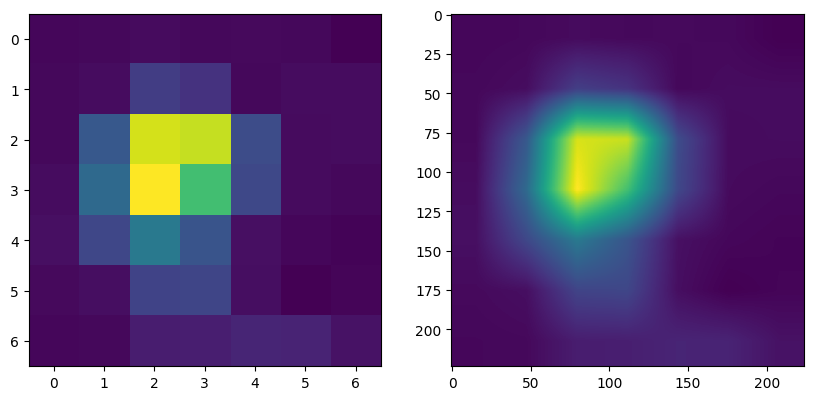

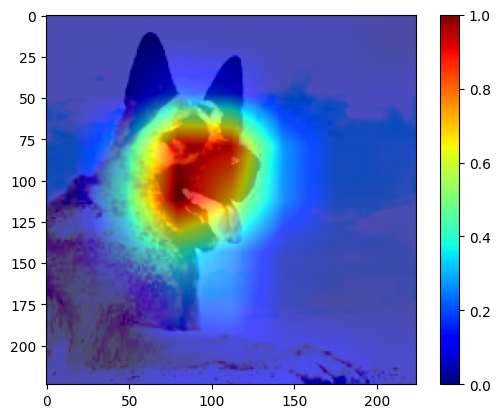

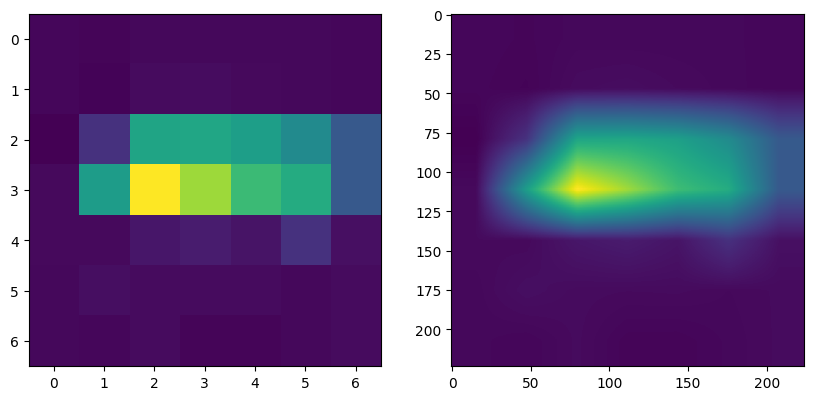

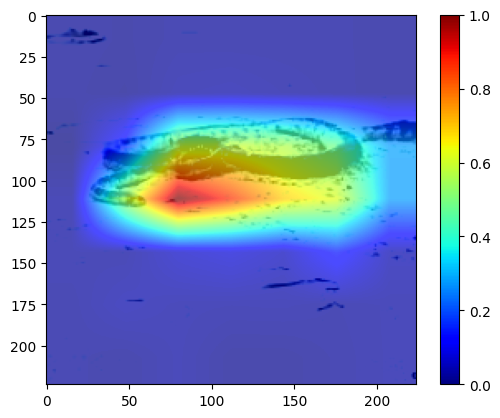

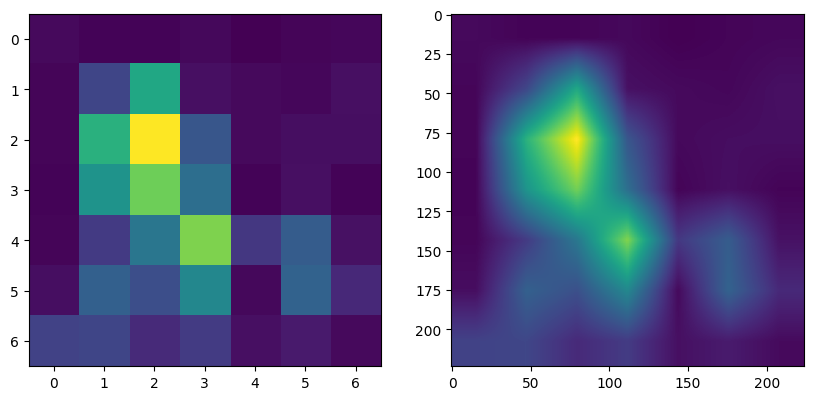

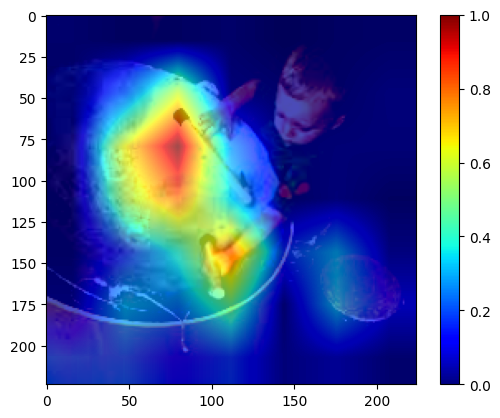

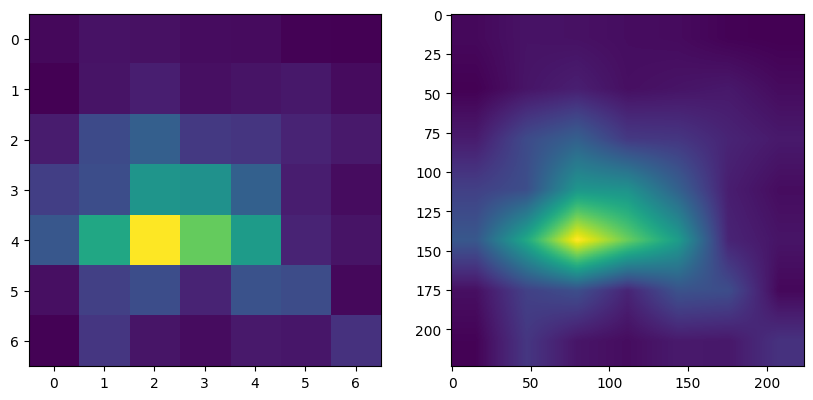

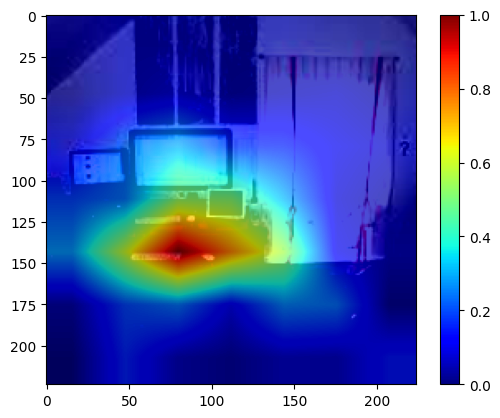

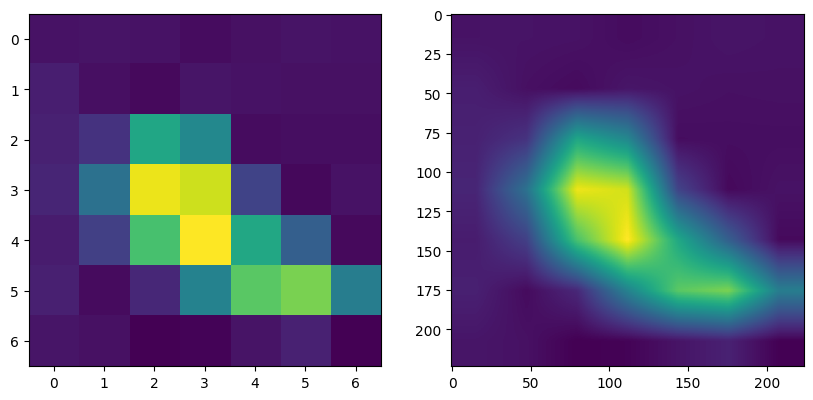

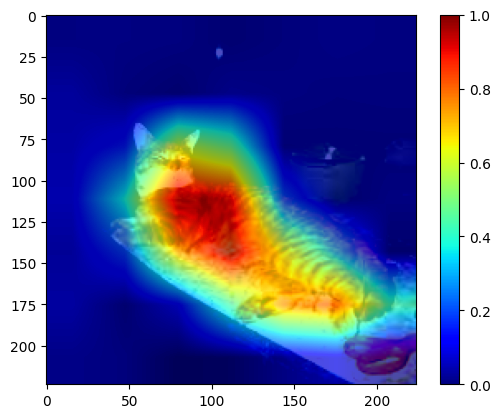

In [64]:
CAM(img1,cv_img1,index1)
CAM(img2,cv_img2,index2)
CAM(img3,cv_img3,index3)
CAM(img4,cv_img4,index4)
CAM(img5,cv_img5,index5)

1)d

In [65]:
from torchvision import transforms
import torch.nn as nn
import cv2
import numpy as np

global globe1
globe1 = []

def relu_backward_hook(module,grad_input,grad_output):
    globe1.append(grad_input[0])
    return grad_input
    
for name, module in model.named_modules():
    if (name == 'layer4.2.relu'):
      if isinstance(module, nn.ReLU):
        module.register_backward_hook(relu_backward_hook)

def guided_grad_CAM(guided_gradients,batch,cv_img,index):
  img_argmax = torch.zeros(1000)
  img_argmax[index] = 1
  # guided backpropagation implementation after new hooks
  batch.requires_grad = True
  guided_output = model(batch)
  v = torch.dot(img_argmax,guided_output.squeeze())
  v.backward()
  res50_conv = nn.Sequential(*list(model.children())[:-2])

  for param in res50_conv.parameters():
      param.requires_grad = False


  input_image = batch.detach()
 

  output = res50_conv(input_image)
  # output in the required format
  orgoutput = output[0].detach()

  gradients = globe1[0].squeeze()
  print(gradients.shape)
  gradients = gradients.mean(dim = (1,2))
  
  print(gradients.shape)
  # gradients = (gradients - torch.min(gradients))/(torch.max(gradients) - torch.min(gradients))
  # print(gradients)

  grad_cam = torch.zeros(size = (7,7))
  for i in range(2048):
    grad_cam = grad_cam + orgoutput[i]*gradients[i]


  grad_cam = grad_cam.numpy()
  resize_grad_cam = cv2.resize(grad_cam, (224, 224),interpolation = cv2.INTER_LINEAR)
  resize_grad_cam = (resize_grad_cam - np.min(resize_grad_cam))/(np.max(resize_grad_cam) - np.min(resize_grad_cam))
  # resize_grad_cam = torch.from_numpy(resize_grad_cam)


  resize_grad_cam = torch.from_numpy(resize_grad_cam)
  # guided_gradients = guided_gradients.transpose((2,1,0))
  print( guided_gradients.shape)
  print(resize_grad_cam.shape)
  main_guided = torch.einsum("hwc->chw",guided_gradients)*resize_grad_cam.unsqueeze(0)
  
  main_guided = (main_guided - torch.min(main_guided))/(torch.max(main_guided) - torch.min(main_guided))

  
  
  plt.figure()

  plt.imshow(torch.einsum("chw->hwc",main_guided))
  plt.show()
  # plt.figure()
  # plt.figure(figsize = (10,10))
  # plt.subplot(1,2,1)
  # plt.imshow(guided)
  # plt.subplot(1,2,2)
  # plt.imshow(resize_grad_cam)
  # plt.figure()
  # s = plt.imshow(resize_grad_cam, cmap='jet')
  # plt.colorbar(s)
  # plt.imshow(cv_img, alpha=0.3)
  return

torch.Size([2048, 7, 7])
torch.Size([2048])
torch.Size([224, 224, 3])
torch.Size([224, 224])


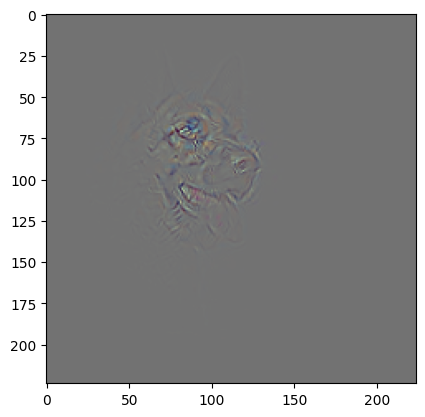

torch.Size([2048, 7, 7])
torch.Size([2048])
torch.Size([224, 224, 3])
torch.Size([224, 224])


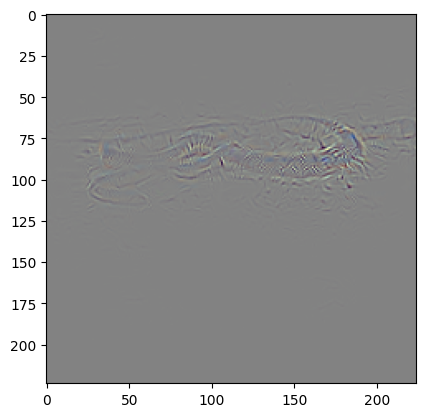

torch.Size([2048, 7, 7])
torch.Size([2048])
torch.Size([224, 224, 3])
torch.Size([224, 224])


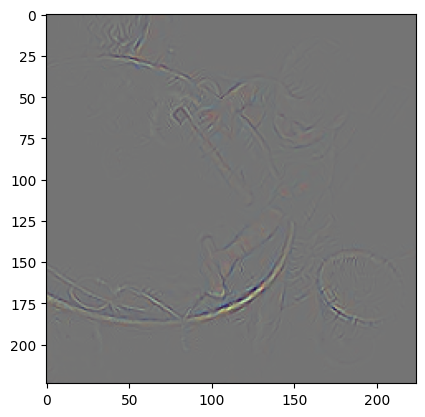

torch.Size([2048, 7, 7])
torch.Size([2048])
torch.Size([224, 224, 3])
torch.Size([224, 224])


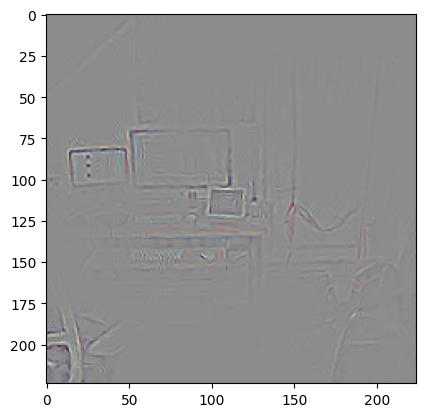

torch.Size([2048, 7, 7])
torch.Size([2048])
torch.Size([224, 224, 3])
torch.Size([224, 224])


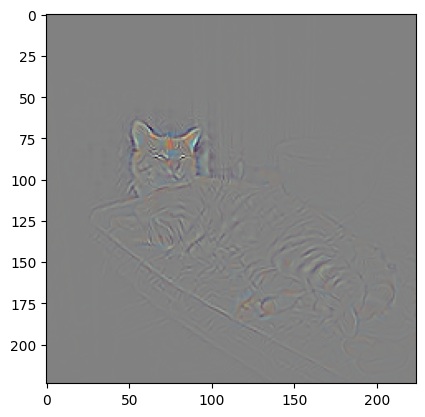

In [66]:
guided_grad_CAM(guided_gradients_1,batch1,cv_img1,index1)
guided_grad_CAM(guided_gradients_2,batch2,cv_img2,index2)
guided_grad_CAM(guided_gradients_3,batch3,cv_img3,index3)
guided_grad_CAM(guided_gradients_4,batch4,cv_img4,index4)
guided_grad_CAM(guided_gradients_5,batch5,cv_img5,index5)